## Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import random
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics.pairwise import cosine_similarity
from tensorflow import keras
from tensorflow.keras import layers

## Load data

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cellphones = pd.read_csv('/content/drive/MyDrive/Dicoding_MLT/cellphones data.csv')
rating = pd.read_csv('/content/drive/MyDrive/Dicoding_MLT/cellphones ratings.csv')
users = pd.read_csv('/content/drive/MyDrive/Dicoding_MLT/cellphones users.csv')

In [ ]:
cellphones.head()

,cellphone_id,brand,model,operating system,internal memory,RAM,performance,main camera,selfie camera,battery size,screen size,weight,price,release date
0,0,Apple,iPhone SE (2022),iOS,128,4,7.23,12,7,2018,4.7,144,429,18/03/2022
1,1,Apple,iPhone 13 Mini,iOS,128,4,7.72,12,12,2438,5.4,141,699,24/09/2021
2,2,Apple,iPhone 13,iOS,128,4,7.75,12,12,3240,6.1,174,699,24/09/2021
3,3,Apple,iPhone 13 Pro,iOS,256,6,7.94,12,12,3065,6.1,204,999,24/09/2021
4,4,Apple,iPhone 13 Pro Max,iOS,256,6,8.01,12,12,4352,6.7,240,1199,24/09/2021


In [ ]:
rating.head()

,user_id,cellphone_id,rating
0,0,30,1
1,0,5,3
2,0,10,9
3,0,9,3
4,0,23,2


In [ ]:
users.head()

,user_id,age,gender,occupation
0,0,38,Female,Data analyst
1,1,40,Female,team worker in it
2,6,55,Female,IT
3,8,25,Female,Manager
4,10,23,Male,worker


## EDA (Univariate)

deskripsi variabel

In [ ]:
cellphones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cellphone_id      33 non-null     int64  
 1   brand             33 non-null     object 
 2   model             33 non-null     object 
 3   operating system  33 non-null     object 
 4   internal memory   33 non-null     int64  
 5   RAM               33 non-null     int64  
 6   performance       33 non-null     float64
 7   main camera       33 non-null     int64  
 8   selfie camera     33 non-null     int64  
 9   battery size      33 non-null     int64  
 10  screen size       33 non-null     float64
 11  weight            33 non-null     int64  
 12  price             33 non-null     int64  
 13  release date      33 non-null     object 
dtypes: float64(2), int64(8), object(4)
memory usage: 3.7+ KB


In [ ]:
cellphones.describe()

,cellphone_id,internal memory,RAM,performance,main camera,selfie camera,battery size,screen size,weight,price
count,33.00000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,16.00000,148.363636,6.787879,6.219091,41.333333,15.484848,4320.666667,6.433333,197.363636,628.272727
std,9.66954,92.197417,2.712904,2.885472,26.350601,10.028463,818.746590,0.476095,25.379394,433.873057
min,0.00000,32.000000,3.000000,1.020000,12.000000,4.000000,2018.000000,4.700000,141.000000,129.000000
25%,8.00000,128.000000,4.000000,3.800000,12.000000,8.000000,4000.000000,6.400000,183.000000,312.000000
50%,16.00000,128.000000,8.000000,6.880000,50.000000,12.000000,4500.000000,6.500000,201.000000,528.000000
75%,24.00000,128.000000,8.000000,7.940000,50.000000,16.000000,5000.000000,6.700000,207.000000,840.000000
max,32.00000,512.000000,12.000000,11.000000,108.000000,40.000000,5003.000000,7.600000,271.000000,1998.000000


In [ ]:
cellphones.describe(include=object)

,brand,model,operating system,release date
count,33,33,33,33
unique,10,33,2,26
top,Samsung,iPhone SE (2022),Android,24/09/2021
freq,8,1,27,4


In [ ]:
print("Nilai unik dari DataFrame 'cellphones':")
for column in cellphones.columns:
    unique_values = cellphones[column].unique()
    print(f"\nKolom '{column}':")
    print(unique_values)

Nilai unik dari DataFrame 'cellphones':

Kolom 'cellphone_id':
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32]

Kolom 'brand':
['Apple' 'Asus' 'Samsung' 'Google' 'OnePlus' 'Oppo' 'Vivo' 'Xiaomi' 'Sony'
 'Motorola']

Kolom 'model':
['iPhone SE (2022)' 'iPhone 13 Mini' 'iPhone 13' 'iPhone 13 Pro'
 'iPhone 13 Pro Max' 'iPhone XR' 'Zenfone 8' 'Galaxy A13' 'Galaxy A32'
 'Galaxy A53' 'Galaxy S22' 'Galaxy S22 Plus' 'Galaxy S22 Ultra'
 'Galaxy Z Flip 3' 'Galaxy Z Fold 3' 'Pixel 6 \xa0' 'Pixel 6a'
 'Pixel 6 Pro\xa0' 'Nord N20' 'Nord 2T' '10 Pro' '10T' 'Find X5 Pro'
 'X80 Pro' 'Redmi Note 11' '11T Pro' '12 Pro' 'Poco F4' 'Xperia Pro'
 'Moto G Stylus (2022)' 'Moto G Play (2021)' 'Moto G Pure'
 'Moto G Power (2022)']

Kolom 'operating system':
['iOS' 'Android']

Kolom 'internal memory':
[128 256  64  32 512]

Kolom 'RAM':
[ 4  6  3  8 12]

Kolom 'performance':
[ 7.23  7.72  7.75  7.94  8.01  4.22  6.76  1.36  2.2   3.79  8.81  7.22
  9.68  5.96

In [ ]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   user_id       990 non-null    int64
 1   cellphone_id  990 non-null    int64
 2   rating        990 non-null    int64
dtypes: int64(3)
memory usage: 23.3 KB


In [ ]:
rating.describe()

,user_id,cellphone_id,rating
count,990.000000,990.000000,990.000000
mean,136.373737,16.421212,6.700000
std,80.664654,9.473466,2.639036
min,0.000000,0.000000,1.000000
25%,74.000000,8.000000,5.000000
50%,128.000000,16.000000,7.000000
75%,226.000000,25.000000,9.000000
max,258.000000,32.000000,18.000000


In [ ]:
print("\nNilai unik dari DataFrame 'rating':")
for column in rating.columns:
    unique_values = rating[column].unique()
    print(f"\nKolom '{column}':")
    print(unique_values)


Nilai unik dari DataFrame 'rating':

Kolom 'user_id':
[  0   1   6   8  10  12  16  24  25  26  27  28  29  30  32  33  35  36
  37  38  52  53  56  60  74  79  80  84  85  91  95  98  99 100 104 105
 106 110 111 112 113 114 115 116 119 120 123 124 126 128 129 137 140 142
 143 144 145 148 152 154 156 160 162 164 169 178 183 194 200 203 204 208
 211 215 226 227 230 231 232 233 234 235 236 237 238 240 242 243 244 245
 246 251 252 253 254 255 256 257 258]

Kolom 'cellphone_id':
[30  5 10  9 23  8 22 16 19  3  7 31 18 32 28 15  4 13  1 27 29 25 20  0
 11 17 21  6 14 12 24 26  2]

Kolom 'rating':
[ 1  3  9  2 10  8  7  5  6  4 18]


In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     99 non-null     int64 
 1   age         99 non-null     int64 
 2   gender      99 non-null     object
 3   occupation  98 non-null     object
dtypes: int64(2), object(2)
memory usage: 3.2+ KB


In [ ]:
users.describe()

,user_id,age
count,99.000000,99.000000
mean,136.373737,36.393939
std,81.034206,9.678314
min,0.000000,21.000000
25%,76.500000,29.500000
50%,128.000000,33.000000
75%,220.500000,42.000000
max,258.000000,61.000000


In [ ]:
users.describe(include=object)

,gender,occupation
count,99,98
unique,3,56
top,Male,Information Technology
freq,50,10


In [ ]:
print("\nNilai unik dari DataFrame 'users':")
for column in users.columns:
    unique_values = users[column].unique()
    print(f"\nKolom '{column}':")
    print(unique_values)


Nilai unik dari DataFrame 'users':

Kolom 'user_id':
[  0   1   6   8  10  12  16  24  25  26  27  28  29  30  32  33  35  36
  37  38  52  53  56  60  74  79  80  84  85  91  95  98  99 100 104 105
 106 110 111 112 113 114 115 116 119 120 123 124 126 128 129 137 140 142
 143 144 145 148 152 154 156 160 162 164 169 178 183 194 200 203 204 208
 211 215 226 227 230 231 232 233 234 235 236 237 238 240 242 243 244 245
 246 251 252 253 254 255 256 257 258]

Kolom 'age':
[38 40 55 25 23 28 31 57 27 29 33 61 34 39 30 41 42 50 48 43 32 36 37 56
 46 49 21 35 58 45]

Kolom 'gender':
['Female' 'Male' '-Select Gender-']

Kolom 'occupation':
['Data analyst' 'team worker in it' 'IT' 'Manager' 'worker' 'Accountant'
 'sales' 'it' 'Team leader' 'FINANCE' 'Finance' 'Sales' 'Ops Manager'
 'ICT Officer' 'QA Software Manager' 'Healthcare' 'self employed'
 'banking' 'nurse' 'executive' 'software developer' nan 'manager'
 'Warehousing' 'WEB DESIGN' 'Information Technology' 'Technical Engineer'
 'information

Pada proses diatas adalah hasil dari statitstik deskriptif untuk data cellphone, seperti jumlah data yang valid (tidak kosong), rata-rata(mean), nilai maksimun dan mininum, dan juga nilai dari kategori unik yang ada dalam setiap fitur. Terdapat beberapa point penting:
- fitur model, terdapat inkonsistensi pada data karena adanya penggunaan tahun walaupun fitur releas date sudah ada
- fitur gender, 'select gender' akan diubah menjadi unknown
- fitur occupation, banyak nya nilai uniqe yang bermakna sama dan juga banyak data yang tidak konsisten.

## Data Processing

**merge all data**

Selanjutnya adalah melakukan penggabungan data. Dengan melakukan penggabungan data ini, maka tiap fitur akan memiliki informasi yang lebih berkesinambungan yang akan meningkatkan keakurasian dari hasil sistem rekomendasi sehingga memungkinkan agar hasil rekomendasi ini lebih berfokus pada personal recom

In [ ]:
merged_df = pd.merge(rating, cellphones, on='cellphone_id', how='inner')
print("DataFrame setelah menggabungkan 'rating' dan 'cellphones':")
merged_df.info()

DataFrame setelah menggabungkan 'rating' dan 'cellphones':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           990 non-null    int64  
 1   cellphone_id      990 non-null    int64  
 2   rating            990 non-null    int64  
 3   brand             990 non-null    object 
 4   model             990 non-null    object 
 5   operating system  990 non-null    object 
 6   internal memory   990 non-null    int64  
 7   RAM               990 non-null    int64  
 8   performance       990 non-null    float64
 9   main camera       990 non-null    int64  
 10  selfie camera     990 non-null    int64  
 11  battery size      990 non-null    int64  
 12  screen size       990 non-null    float64
 13  weight            990 non-null    int64  
 14  price             990 non-null    int64  
 15  release date      990 non-null  

In [ ]:
final_merged_df = pd.merge(merged_df, users, on='user_id', how='inner')
print("\nDataFrame setelah menggabungkan dengan 'users':")
final_merged_df.info()


DataFrame setelah menggabungkan dengan 'users':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           990 non-null    int64  
 1   cellphone_id      990 non-null    int64  
 2   rating            990 non-null    int64  
 3   brand             990 non-null    object 
 4   model             990 non-null    object 
 5   operating system  990 non-null    object 
 6   internal memory   990 non-null    int64  
 7   RAM               990 non-null    int64  
 8   performance       990 non-null    float64
 9   main camera       990 non-null    int64  
 10  selfie camera     990 non-null    int64  
 11  battery size      990 non-null    int64  
 12  screen size       990 non-null    float64
 13  weight            990 non-null    int64  
 14  price             990 non-null    int64  
 15  release date      990 non-null    object 


In [ ]:
final_merged_df.head(10)

,user_id,cellphone_id,rating,brand,model,operating system,internal memory,RAM,performance,main camera,selfie camera,battery size,screen size,weight,price,release date,age,gender,occupation
0,0,30,1,Motorola,Moto G Play (2021),Android,32,3,1.42,13,5,5000,6.5,204,159,14/01/2021,38,Female,Data analyst
1,0,5,3,Apple,iPhone XR,iOS,64,3,4.22,12,7,2942,6.1,194,236,26/10/2018,38,Female,Data analyst
2,0,10,9,Samsung,Galaxy S22,Android,128,8,8.81,50,10,3700,6.1,167,528,25/02/2022,38,Female,Data analyst
3,0,9,3,Samsung,Galaxy A53,Android,128,6,3.79,64,32,5000,6.5,189,312,24/03/2022,38,Female,Data analyst
4,0,23,2,Vivo,X80 Pro,Android,256,8,9.81,50,32,4700,6.7,215,872,29/04/2022,38,Female,Data analyst
5,0,8,2,Samsung,Galaxy A32,Android,64,4,2.20,48,13,5000,6.5,205,199,22/01/2021,38,Female,Data analyst
6,0,22,1,Oppo,Find X5 Pro,Android,256,12,10.12,50,32,5000,6.7,218,987,14/03/2022,38,Female,Data analyst
7,0,16,2,Google,Pixel 6a,Android,128,6,6.88,12,8,4410,6.1,178,449,21/07/2021,38,Female,Data analyst
8,0,19,1,OnePlus,Nord 2T,Android,128,8,6.04,50,32,4500,6.4,190,379,21/05/2022,38,Female,Data analyst
9,0,3,10,Apple,iPhone 13 Pro,iOS,256,6,7.94,12,12,3065,6.1,204,999,24/09/2021,38,Female,Data analyst


## Data Preparation

In [ ]:
df_preparation = final_merged_df.copy()

**Memperbaiki fitur gender**

Nilai '-Select Gender-' kemungkinan merupakan nilai placeholder atau nilai default yang muncul ketika pengguna tidak memilih jenis kelamin secara spesifik. Menggantinya dengan 'Unknown' menciptakan representasi yang lebih standar dan konsisten untuk data yang tidak teridentifikasi.

In [ ]:
# Mengganti '-Select Gender-' dengan 'Unknown'
df_preparation['gender'] = df_preparation['gender'].replace('-Select Gender-', 'Unknown')

print(df_preparation['gender'].unique())

['Female' 'Male' 'Unknown']


**Memperbaiki Fitur Occupation**

Tujuan dari kode ini adalah untuk mengelompokkan dan menstandarkan berbagai jenis pekerjaan (occupation) ke dalam kategori yang lebih umum dan terstruktur. Ini dilakukan dengan menggunakan sebuah mapping dictionary (occupation_mapping).

In [ ]:
occupation_mapping = {
    'team worker in it': 'IT',
    'it': 'IT',
    'information technology': 'IT',
    'information': 'IT',
    'Information Technology': 'IT',
    'Information technology': 'IT',
    'WEB DESIGN': 'IT',
    'software developer': 'IT',
    'ict officer': 'IT',
    'technical engineer': 'Engineer',
    'engineer': 'Engineer',
    'manager': 'Manager',
    'Manager': 'Manager',
    'MANAGER': 'Manager',
    'Ops Manager': 'Manager',
    'QA Software Manager': 'Manager',
    'Executive Manager': 'Executive',
    'executive': 'Executive',
    'accountant': 'Finance',
    'Accountant': 'Finance',
    'FINANCE': 'Finance',
    'Finance': 'Finance',
    'sales': 'Sales',
    'Sales': 'Sales',
    'SALES MANAGER': 'Sales',
    'teacher': 'Education',
    'EDUCATION': 'Education',
    'Education': 'Education',
    'healthcare': 'Healthcare',
    'Healthcare': 'Healthcare',
    'HEALTHARE': 'Healthcare',
    'HEALTHCARE': 'Healthcare',
    'nurse': 'Healthcare',
    'banking': 'Finance',
    'finance': 'Finance',
    'administrator': 'Admin',
    'Administrator': 'Admin',
    'ADMINISTRATIVE OFFICER': 'Admin',
    'Administrative officer': 'Admin',
    'technician': 'Technical',
    'Computer technician': 'Technical',
    'marketing': 'Marketing',
    'Marketing': 'Marketing',
    'writer': 'Other',
    'registered': 'Other',
    'business': 'Other',
    'Transportation': 'Other',
    'president transportation company': 'Transportation',
    'construction': 'Other',
    'master degree': 'Education',
    'Warehousing': 'Other',
    'self employed': 'Other',
    'retail': 'Sales',
    'homemaker': 'Other',
    'Purchase Manager': 'Manager',
    'System Administrator': 'IT',
    'Security': 'Technical',
    'Team leader': 'Other',
    'team leader': 'Other',
    'worker': 'Other',
    'doctor': 'Healthcare',
    np.nan: 'Unknown'
}
df_preparation['occupation'] = df_preparation['occupation'].map(occupation_mapping).fillna(df_preparation['occupation'])


In [ ]:
print(df_preparation['occupation'].unique())

['Data analyst' 'IT' 'Manager' 'Other' 'Finance' 'Sales' 'ICT Officer'
 'Healthcare' 'Executive' 'Unknown' 'Technical Engineer' 'Admin'
 'Marketing' 'Education' 'Technical']


**Memperbaikin fitur release date**

Selanjutnya adalah melakukan perubahan format data pada kolom 'release date' menjadi tipe data datetime yang dikenali oleh Pandas dengan menggunakan fungsi to_datetime().

In [ ]:
# Mengonversi kolom 'release date' ke format datetime Pandas
df_preparation['release date'] = pd.to_datetime(df_preparation['release date'], format='%d/%m/%Y', errors='coerce')
print("Nilai unik dan tipe data kolom 'release date' setelah konversi:")
print(df_preparation['release date'].unique())
print(df_preparation['release date'].dtype)

Nilai unik dan tipe data kolom 'release date' setelah konversi:
<DatetimeArray>
['2021-01-14 00:00:00', '2018-10-26 00:00:00', '2022-02-25 00:00:00',
 '2022-03-24 00:00:00', '2022-04-29 00:00:00', '2021-01-22 00:00:00',
 '2022-03-14 00:00:00', '2021-07-21 00:00:00', '2022-05-21 00:00:00',
 '2021-09-24 00:00:00', '2022-03-23 00:00:00', '2021-10-14 00:00:00',
 '2022-04-28 00:00:00', '2022-02-22 00:00:00', '2021-01-27 00:00:00',
 '2021-10-28 00:00:00', '2021-08-11 00:00:00', '2022-07-27 00:00:00',
 '2022-04-27 00:00:00', '2021-10-05 00:00:00', '2022-01-11 00:00:00',
 '2022-03-18 00:00:00', '2022-08-06 00:00:00', '2021-05-12 00:00:00',
 '2022-02-09 00:00:00', '2021-12-31 00:00:00']
Length: 26, dtype: datetime64[ns]
datetime64[ns]


**memperbaiki fitur model**

membersihkan dan menstandarkan data pada kolom 'model' dengan melakukan dua jenis penggantian string
- Mengganti non-breaking space : Menggantinya dengan spasi biasa memastikan konsistensi dan mencegah kesalahan saat membandingkan atau menganalisis nama model.
- Menghapus informasi tahun yang berada di dalam tanda kurung: membersihkan nama model dari informasi tahun rilis, yang sebenarnya sudah ada di fitur release date

In [ ]:
# Mengganti non-breaking space dengan spasi biasa
df_preparation['model'] = df_preparation['model'].str.replace('\xa0', ' ', regex=False)

# Menghapus informasi tahun yang berada di dalam tanda kurung
df_preparation['model'] = df_preparation['model'].str.replace(r'\s*\(\d{4}\)', '', regex=True).str.strip()
print("\nNilai unik kolom 'model' setelah menghapus tahun:")
print(df_preparation['model'].unique())


Nilai unik kolom 'model' setelah menghapus tahun:
['Moto G Play' 'iPhone XR' 'Galaxy S22' 'Galaxy A53' 'X80 Pro'
 'Galaxy A32' 'Find X5 Pro' 'Pixel 6a' 'Nord 2T' 'iPhone 13 Pro'
 'Galaxy A13' 'Moto G Pure' 'Nord N20' 'Moto G Power' 'Xperia Pro'
 'Pixel 6' 'iPhone 13 Pro Max' 'Galaxy Z Flip 3' 'iPhone 13 Mini'
 'Poco F4' 'Moto G Stylus' '11T Pro' '10 Pro' 'iPhone SE'
 'Galaxy S22 Plus' 'Pixel 6 Pro' '10T' 'Zenfone 8' 'Galaxy Z Fold 3'
 'Galaxy S22 Ultra' 'Redmi Note 11' '12 Pro' 'iPhone 13']


In [ ]:
df_preparation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   user_id           990 non-null    int64         
 1   cellphone_id      990 non-null    int64         
 2   rating            990 non-null    int64         
 3   brand             990 non-null    object        
 4   model             990 non-null    object        
 5   operating system  990 non-null    object        
 6   internal memory   990 non-null    int64         
 7   RAM               990 non-null    int64         
 8   performance       990 non-null    float64       
 9   main camera       990 non-null    int64         
 10  selfie camera     990 non-null    int64         
 11  battery size      990 non-null    int64         
 12  screen size       990 non-null    float64       
 13  weight            990 non-null    int64         
 14  price             990 non-

**cek missing value**

In [ ]:
df_preparation.isnull().sum()

,0
user_id,0
cellphone_id,0
rating,0
brand,0
model,0
operating system,0
internal memory,0
RAM,0
performance,0
main camera,0


- tidak ditemukan adanya missing value

**cek duplicate**

In [ ]:
duplicate_count = df_preparation.duplicated().sum()
print(f"Jumlah Data Duplikat: {duplicate_count}")

Jumlah Data Duplikat: 0


- tidak ditemukan adanya duplikat

In [ ]:
df_preparation.sample(20)

,user_id,cellphone_id,rating,brand,model,operating system,internal memory,RAM,performance,main camera,selfie camera,battery size,screen size,weight,price,release date,age,gender,occupation
333,100,30,8,Motorola,Moto G Play,Android,32,3,1.42,13,5,5000,6.5,204,159,2021-01-14,43,Female,IT
162,35,26,2,Xiaomi,12 Pro,Android,128,8,9.85,50,32,4600,6.7,204,618,2021-12-31,41,Male,Other
865,242,4,8,Apple,iPhone 13 Pro Max,iOS,256,6,8.01,12,12,4352,6.7,240,1199,2021-09-24,35,Male,Healthcare
365,106,26,7,Xiaomi,12 Pro,Android,128,8,9.85,50,32,4600,6.7,204,618,2021-12-31,32,Male,Manager
945,254,20,8,OnePlus,10 Pro,Android,128,8,8.86,48,32,5000,6.7,201,780,2022-01-11,25,Female,IT
693,203,29,5,Motorola,Moto G Stylus,Android,128,6,2.30,50,16,5000,6.8,215,500,2022-04-27,38,Female,IT
403,113,27,1,Xiaomi,Poco F4,Android,128,8,6.98,64,20,4500,6.6,195,428,2022-07-27,56,Female,Sales
697,203,13,2,Samsung,Galaxy Z Flip 3,Android,128,8,5.96,12,10,3300,6.7,183,899,2021-08-11,38,Female,IT
893,245,4,8,Apple,iPhone 13 Pro Max,iOS,256,6,8.01,12,12,4352,6.7,240,1199,2021-09-24,35,Male,Healthcare
431,116,4,10,Apple,iPhone 13 Pro Max,iOS,256,6,8.01,12,12,4352,6.7,240,1199,2021-09-24,32,Male,Education


## Model Development

**Model Development dengan Content Based Filtering**

**data preparation**

In [ ]:
# Pilih Fitur Relevan untuk Content-Based
features = ['brand', 'operating system', 'internal memory', 'RAM', 'performance',
            'main camera', 'selfie camera', 'battery size', 'screen size', 'price']
content_df = df_preparation[features + ['user_id', 'model', 'cellphone_id', 'rating']].copy()

# Pra-proses Fitur: One-Hot Encode fitur kategorikal
content_df = pd.get_dummies(content_df, columns=['brand', 'operating system'])

# Pra-proses Fitur: Scaling fitur numerik
numeric_features = ['internal memory', 'RAM', 'performance', 'main camera',
                    'selfie camera', 'battery size', 'screen size', 'price']
scaler = MinMaxScaler()
content_df[numeric_features] = scaler.fit_transform(content_df[numeric_features])

print("\nDataFrame content_df setelah pra-pemrosesan untuk Content-Based Filtering:")
content_df.head()


DataFrame content_df setelah pra-pemrosesan untuk Content-Based Filtering:


,internal memory,RAM,performance,main camera,selfie camera,battery size,screen size,price,user_id,model,...,brand_Google,brand_Motorola,brand_OnePlus,brand_Oppo,brand_Samsung,brand_Sony,brand_Vivo,brand_Xiaomi,operating system_Android,operating system_iOS
0,0.000000,0.000000,0.040080,0.010417,0.027778,0.998995,0.620690,0.016051,0,Moto G Play,...,False,True,False,False,False,False,False,False,True,False
1,0.066667,0.000000,0.320641,0.000000,0.083333,0.309548,0.482759,0.057250,0,iPhone XR,...,False,False,False,False,False,False,False,False,False,True
2,0.200000,0.555556,0.780561,0.395833,0.166667,0.563484,0.482759,0.213483,0,Galaxy S22,...,False,False,False,False,True,False,False,False,True,False
3,0.200000,0.333333,0.277555,0.541667,0.777778,0.998995,0.620690,0.097913,0,Galaxy A53,...,False,False,False,False,True,False,False,False,True,False
4,0.466667,0.555556,0.880762,0.395833,0.777778,0.898492,0.689655,0.397539,0,X80 Pro,...,False,False,False,False,False,False,True,False,True,False


Kode ini bertujuan untuk mempersiapkan data agar sesuai untuk digunakan dalam model Content-Based Filtering. Fokusnya adalah pada pembuatan representasi fitur untuk setiap item (ponsel) berdasarkan atribut-atributnya. Beberapa hal penting yang dapat kita amati:
- Fitur Numerik yang Di-scaling sehingga memiliki nilai dalam rentang antara 0 dan 1 dengan menggunakan MinMaxScaler.
-Encoding Fitur Kategorikal menggunakan One-Hot Encoder

**membuat item profile (HP)**

 dilakukan penhitungan untuk item profil (cellphone) untuk setiap model ponsel dengan mengambil rata-rata (mean) dari fitur-fitur numerik yang telah diproses sebelumnya (melalui one-hot encoding dan scaling).

In [ ]:
# Membuat Profil Item (HP) berdasarkan rata-rata fitur
item_profiles = content_df.groupby('model')[content_df.select_dtypes(include=np.number).columns].mean()

print("\nProfil Item (HP) untuk Content-Based Filtering:")
print(item_profiles.head())
print(f"Shape profil item: {item_profiles.shape}")


Profil Item (HP) untuk Content-Based Filtering:
             internal memory       RAM  performance  main camera  \
model                                                              
10 Pro              0.200000  0.555556     0.785571     0.375000   
10T                 0.200000  0.555556     1.000000     0.395833   
11T Pro             0.466667  0.555556     0.658317     1.000000   
12 Pro              0.200000  0.555556     0.884770     0.395833   
Find X5 Pro         0.466667  1.000000     0.911824     0.395833   

             selfie camera  battery size  screen size     price     user_id  \
model                                                                         
10 Pro            0.777778      0.998995     0.689655  0.348315  147.400000   
10T               0.333333      0.931993     0.689655  0.278224  143.000000   
11T Pro           0.333333      0.998995     0.655172  0.163724  147.894737   
12 Pro            0.777778      0.864992     0.689655  0.261637  105.071429   


**menampilkan matrix cosine similiarity**

Dengan matriks cosine_sim_df, dapat dengan mudah diketahui seberapa mirip suatu model ponsel dengan model ponsel lainnya berdasarkan fitur-fitur yang digunkan untuk membuat profil item. Misalnya, jika nilai pada cosine_sim_df['Galaxy A32']['G Power'] tinggi, itu berarti kedua ponsel tersebut memiliki profil fitur yang serupa.

In [ ]:
# Menghitung Cosine Similarity antar Item Profiles
cosine_sim_items = cosine_similarity(item_profiles)

# Membuat DataFrame dari matriks Cosine Similarity
cosine_sim_df = pd.DataFrame(cosine_sim_items, index=item_profiles.index, columns=item_profiles.index)

print("\nMatriks Cosine Similarity Antar Item (HP):")
cosine_sim_df.sample(10)


Matriks Cosine Similarity Antar Item (HP):


model,10 Pro,10T,11T Pro,12 Pro,Find X5 Pro,Galaxy A13,Galaxy A32,Galaxy A53,Galaxy S22,Galaxy S22 Plus,...,Redmi Note 11,X80 Pro,Xperia Pro,Zenfone 8,iPhone 13,iPhone 13 Mini,iPhone 13 Pro,iPhone 13 Pro Max,iPhone SE,iPhone XR
model,,,,,,,,,,,,,,,,,,,,,
X80 Pro,0.999119,0.999463,0.999927,0.997757,0.999749,0.991964,0.992857,0.993574,0.995196,0.997061,...,0.999688,1.000000,0.999581,0.991403,0.987014,0.985553,0.988432,0.989033,0.984426,0.990987
Moto G Stylus,0.997965,0.998608,0.999492,0.998732,0.998967,0.989045,0.990115,0.990870,0.992752,0.995108,...,0.999179,0.999666,0.999912,0.988353,0.983150,0.981633,0.984701,0.985515,0.980401,0.987747
12 Pro,0.994080,0.995086,0.997033,1.000000,0.996021,0.981339,0.982689,0.983839,0.986511,0.989756,...,0.996058,0.997757,0.999029,0.980473,0.974272,0.972119,0.976341,0.977057,0.970554,0.979991
iPhone XR,0.995642,0.994508,0.992106,0.979991,0.993659,0.999876,0.999762,0.999709,0.999319,0.998284,...,0.993156,0.990987,0.986982,0.999884,0.999625,0.999300,0.999805,0.999864,0.999024,1.000000
Galaxy S22,0.998379,0.997665,0.996016,0.986511,0.997102,0.999535,0.999703,0.999847,1.000000,0.999758,...,0.996722,0.995196,0.992172,0.999418,0.997977,0.997379,0.998484,0.998726,0.996879,0.999319
Galaxy A13,0.996377,0.995387,0.993097,0.981339,0.994504,1.000000,0.999969,0.999894,0.999535,0.998713,...,0.994180,0.991964,0.988215,0.999964,0.999272,0.999007,0.999462,0.999704,0.998704,0.999876
Xperia Pro,0.997617,0.998292,0.999302,0.999029,0.998767,0.988215,0.989316,0.990140,0.992172,0.994625,...,0.998860,0.999581,1.000000,0.987549,0.982284,0.980659,0.983942,0.984696,0.979380,0.986982
10T,0.999921,1.000000,0.999737,0.995086,0.999919,0.995387,0.996077,0.996548,0.997665,0.998901,...,0.999898,0.999463,0.998292,0.994967,0.991335,0.990264,0.992413,0.993030,0.989358,0.994508
iPhone 13 Pro Max,0.994291,0.993030,0.990288,0.977057,0.992036,0.999704,0.999503,0.999354,0.998726,0.997420,...,0.991497,0.989033,0.984696,0.999804,0.999886,0.999734,0.999925,1.000000,0.999551,0.999864


**User Profile untuk Content-Based Filtering**

Membuat representasi numerik dari preferensi setiap pengguna berdasarkan item (dalam hal ini, ponsel) yang telah mereka beri rating tinggi.

In [ ]:
# Fungsi untuk membuat profil pengguna berdasarkan rating tinggi
def create_user_profile_cb(user_id, rating_threshold=4):
    rated_high = content_df[(content_df['user_id'] == user_id) & (content_df['rating'] >= rating_threshold)]
    if not rated_high.empty:
        user_profile = rated_high[content_df.select_dtypes(include=np.number).columns].mean()
        return user_profile
    else:
        return None

# Membuat profil pengguna untuk semua pengguna
user_profiles_cb = {}
for user in content_df['user_id'].unique():
    profile = create_user_profile_cb(user)
    if profile is not None:
        user_profiles_cb[user] = profile

Untuk setiap pengguna dalam dataset, kode ini mencari item yang mereka beri rating tinggi. Kemudian,  dihitung rata-rata fitur-fitur dari item-item tersebut untuk membuat "profil" yang merepresentasikan apa yang disukai pengguna tersebut. Profil-profil ini kemudian disimpan untuk digunakan dalam merekomendasikan item baru kepada pengguna berdasarkan kemiripan fitur dengan profil mereka.

In [ ]:
print("\nHasil Beberapa Profil Pengguna (Content-Based) :")
for i, (user_id, profile) in enumerate(user_profiles_cb.items()):
    if i < 5:
        print(f"User ID: {user_id}, Profil:\n{profile.head()}")
    if i == 5:
        break
print(f"\nJumlah profil pengguna (Content-Based) yang berhasil dibuat: {len(user_profiles_cb)}")


Hasil Beberapa Profil Pengguna (Content-Based) :
User ID: 0, Profil:
internal memory    0.333333
RAM                0.444444
performance        0.736974
main camera        0.197917
selfie camera      0.194444
dtype: float64
User ID: 1, Profil:
internal memory    0.266667
RAM                0.311111
performance        0.360120
main camera        0.211458
selfie camera      0.161111
dtype: float64
User ID: 6, Profil:
internal memory    0.142857
RAM                0.269841
performance        0.308331
main camera        0.302083
selfie camera      0.269841
dtype: float64
User ID: 8, Profil:
internal memory    0.240000
RAM                0.533333
performance        0.597595
main camera        0.429167
selfie camera      0.355556
dtype: float64
User ID: 10, Profil:
internal memory    0.318519
RAM                0.530864
performance        0.673013
main camera        0.319444
selfie camera      0.351852
dtype: float64

Jumlah profil pengguna (Content-Based) yang berhasil dibuat: 99


**Rekomendasi Content Based**

Mengimplementasikan sistem rekomendasi content-based filtering. Fungsi ini mengambil profil pengguna dan item, menghitung kemiripan antara profil pengguna dan setiap item, dan mengembalikan daftar item yang paling mirip (dan belum di-rating oleh pengguna) sebagai rekomendasi.

In [ ]:
# Fungsi untuk memberikan rekomendasi Content-Based
def recommend_content_based(user_id, user_profiles, item_profiles, content_df, top_n=5):
    user_profile = user_profiles.get(user_id)
    if user_profile is None:
        return f"Pengguna dengan ID {user_id} tidak memiliki rating tinggi."

    similarity_scores = cosine_similarity([user_profile], item_profiles)[0]
    similarity_df = pd.DataFrame({'model': item_profiles.index, 'similarity': similarity_scores})
    # pengecualian item yang sudah di rating
    rated_items = content_df[content_df['user_id'] == user_id]['model'].unique()
    recommendations = similarity_df[~similarity_df['model'].isin(rated_items)].sort_values(by='similarity', ascending=False).head(top_n)
    return recommendations

In [ ]:
# Contoh rekomendasi Content-Based untuk user_id=1
recommendations_user_1_cb = recommend_content_based(1, user_profiles_cb, item_profiles, content_df)
print("\nRekomendasi Content-Based untuk User ID 1:")
print(recommendations_user_1_cb)


Rekomendasi Content-Based untuk User ID 1:
            model  similarity
3          12 Pro    0.299312
13    Moto G Play    0.252409
16  Moto G Stylus    0.251552
22        Poco F4    0.242491
24        X80 Pro    0.237197


**Model Development dengan Collaborative Filltering**

data preparation

Mempersiapkan data untuk tugas collaborative filtering menggunakan model neural network. Langkah-langkah utamanya adalah:

- Mengubah ID pengguna dan item menjadi indeks numerik berurutan.
- Membagi data menjadi set pelatihan dan pengujian.
- Membuat TensorFlow Dataset yang efisien untuk memproses data selama pelatihan dan evaluasi model.
- Menskalakan nilai rating ke rentang 0-1.


In [ ]:
# Konversi ID ke Numerik Berurutan
user_encoder = LabelEncoder()
df_preparation['user_index'] = user_encoder.fit_transform(df_preparation['user_id'])
item_encoder = LabelEncoder()
df_preparation['item_index'] = item_encoder.fit_transform(df_preparation['cellphone_id'])
num_users = len(user_encoder.classes_)
num_items = len(item_encoder.classes_)

# Split Data
train_df, test_df = train_test_split(df_preparation, test_size=0.2, random_state=42)

# Buat TensorFlow Dataset
def create_tf_dataset(df):
    user_ids = df['user_index'].values
    item_ids = df['item_index'].values
    ratings = df['rating'].values.astype(np.float32) / 5.0 # Skalakan rating ke 0-1
    stacked_ids = np.stack((user_ids, item_ids), axis=1)
    return tf.data.Dataset.from_tensor_slices((stacked_ids, ratings))

train_dataset = create_tf_dataset(train_df).batch(64).prefetch(tf.data.AUTOTUNE)
test_dataset = create_tf_dataset(test_df).batch(64).prefetch(tf.data.AUTOTUNE)

modelling

RecommenderNetV2: Model rekomendasi collaborative filtering dengan arsitektur NN yang lebih dalam untuk mempelajari pola interaksi pengguna-item.

In [ ]:
# Definisikan Model (RecommenderNet) dengan lebih banyak layer dan dropout
class RecommenderNetV2(tf.keras.Model):
    def __init__(self, num_users, num_items, embedding_size, hidden_units, dropout_rate=0.1, **kwargs):
        super(RecommenderNetV2, self).__init__(**kwargs)
        self.num_users = num_users
        self.num_items = num_items
        self.embedding_size = embedding_size
        self.user_embedding = layers.Embedding(num_users, embedding_size, embeddings_initializer='he_normal', embeddings_regularizer=keras.regularizers.l2(1e-6))
        self.user_bias = layers.Embedding(num_users, 1)
        self.item_embedding = layers.Embedding(num_items, embedding_size, embeddings_initializer='he_normal', embeddings_regularizer=keras.regularizers.l2(1e-6))
        self.item_bias = layers.Embedding(num_items, 1)
        self.dense_1 = layers.Dense(hidden_units, activation='relu')
        self.dropout_1 = layers.Dropout(dropout_rate)
        self.dense_2 = layers.Dense(hidden_units // 2, activation='relu')
        self.dropout_2 = layers.Dropout(dropout_rate)
        self.dense_output = layers.Dense(1, activation='sigmoid')

    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:, 0])
        user_bias = self.user_bias(inputs[:, 0])
        item_vector = self.item_embedding(inputs[:, 1])
        item_bias = self.item_bias(inputs[:, 1])
        dot_user_item = tf.tensordot(user_vector, item_vector, 2)
        x = dot_user_item + user_bias + item_bias
        x = self.dense_1(x)
        x = self.dropout_1(x)
        x = self.dense_2(x)
        x = self.dropout_2(x)
        return self.dense_output(x)

compile dan train

Menginstansiasi model RecommenderNetV2 dengan konfigurasi tertentu (ukuran embedding, jumlah hidden unit, dropout rate), mengompilasinya dengan optimizer, fungsi loss, dan metrik yang sesuai, serta melatihnya dengan data yang telah disiapkan menggunakan early stopping untuk mencegah overfitting dan mendapatkan model dengan kinerja terbaik.

In [ ]:
# Instansiasi dan Kompilasi Model yang Lebih Baik
embedding_size = 64
hidden_units = 128
dropout_rate = 0.2
model = RecommenderNetV2(num_users, num_items, embedding_size, hidden_units, dropout_rate)
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

# Latih Model dengan lebih banyak epoch dan early stopping
epochs = 30
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(
    train_dataset,
    epochs=epochs,
    validation_data=test_dataset,
    callbacks=[early_stopping]
)

Epoch 1/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.9687 - root_mean_squared_error: 0.9838 - val_loss: 0.9151 - val_root_mean_squared_error: 0.9565
Epoch 2/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8035 - root_mean_squared_error: 0.8959 - val_loss: 0.8303 - val_root_mean_squared_error: 0.9111
Epoch 3/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6229 - root_mean_squared_error: 0.7889 - val_loss: 0.7534 - val_root_mean_squared_error: 0.8679
Epoch 4/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4999 - root_mean_squared_error: 0.7068 - val_loss: 0.6888 - val_root_mean_squared_error: 0.8298
Epoch 5/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4452 - root_mean_squared_error: 0.6670 - val_loss: 0.6361 - val_root_mean_squared_error: 0.7974
Epoch 6/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4192 - root_mean_squared_error: 0.6472 - val_loss: 0.5969 - val_root_mean_squared_error: 0.7724
Epoch 7/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.407

## Evaluasi

mengukur seberapa baik model yang telah dilatih dapat melakukan generalisasi ke data baru dan tidak dikenal. Loss dan RMSE pada test set memberikan indikasi kinerja model yang sebenarnya.

In [ ]:
# Evaluasi Model
loss, rmse = model.evaluate(test_dataset)
print(f"\nLoss on test set (Neural CF): {loss:.4f}")
print(f"RMSE on test set (Neural CF): {rmse:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4821 - root_mean_squared_error: 0.6940

Loss on test set (Neural CF): 0.4909
RMSE on test set (Neural CF): 0.7005


Selanjutnya melkukan plotting dari hasil pelatihan model

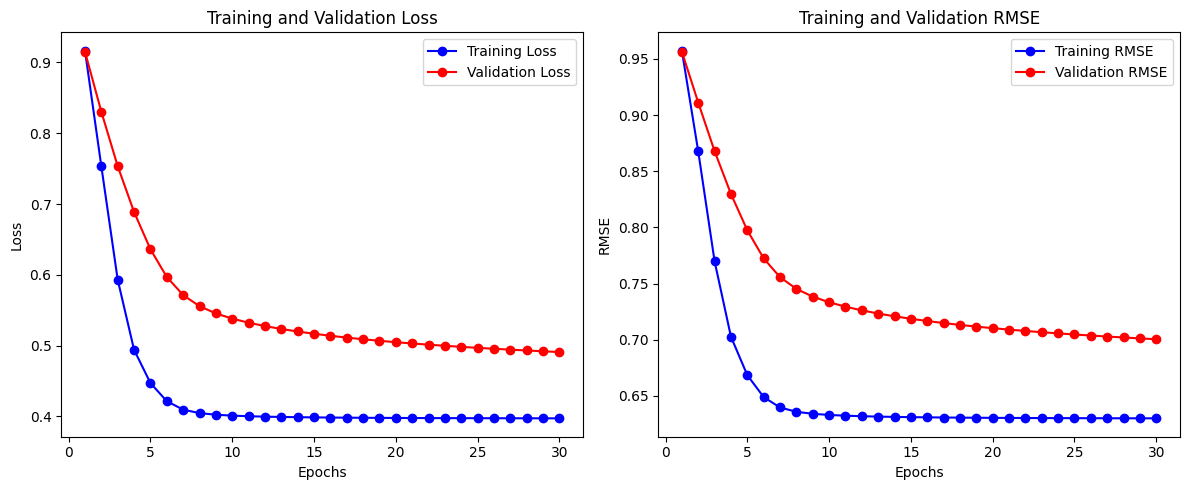

In [ ]:
import matplotlib.pyplot as plt

# Ambil riwayat pelatihan dari objek history
history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
rmse_values = history_dict['root_mean_squared_error']
val_rmse_values = history_dict['val_root_mean_squared_error']

epochs = range(1, len(loss_values) + 1)

# Plot Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss_values, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss_values, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot RMSE
plt.subplot(1, 2, 2)
plt.plot(epochs, rmse_values, 'bo-', label='Training RMSE')
plt.plot(epochs, val_rmse_values, 'ro-', label='Validation RMSE')
plt.title('Training and Validation RMSE')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()

plt.tight_layout()
plt.show()

**Rekomendasi Collaborative Filltering**

Menghasilkan rekomendasi HP yang dipersonalisasi untuk pengguna berdasarkan preferensi pengguna lain yang serupa, menggunakan model Neural Collaborative Filtering yang telah dilatih.

In [1]:
def recommend_top_n_neural_cf_final_unique_simplified(user_id, model, user_encoder, item_encoder, df, top_n=10):
    try:
        user_index = user_encoder.transform([user_id])[0]
    except KeyError:
        return f"User ID {user_id} tidak ditemukan dalam data."

    items_rated_by_user = df[df['user_id'] == user_id]['item_index'].unique()
    all_item_indices = np.arange(len(item_encoder.classes_))
    items_to_predict = np.setdiff1d(all_item_indices, items_rated_by_user)

    if not items_to_predict.size:
        return f"Pengguna {user_id} telah menilai semua HP yang tersedia."

    user_input = np.expand_dims(np.array([user_index] * len(items_to_predict)), axis=1)
    item_input = np.expand_dims(items_to_predict, axis=1)

    predictions = model.predict(np.concatenate([user_input, item_input], axis=1))

    top_n_indices = np.argsort(predictions, axis=0)[::-1][:top_n].flatten()
    recommended_item_indices = items_to_predict[top_n_indices]
    recommended_item_ids = item_encoder.inverse_transform(recommended_item_indices)
    predicted_ratings = predictions[top_n_indices].flatten()

    # Buat DataFrame hasil rekomendasi dengan peringkat dan predicted rating
    recommendation_df = pd.DataFrame({'cellphone_id': recommended_item_ids,
                                      'Predicted Rating (Scaled 0-1)': predicted_ratings,
                                      'Peringkat': range(1, top_n + 1)})

    # Gabungkan dengan detail unik HP dari DataFrame asli
    unique_hp_details = df.drop_duplicates(subset='cellphone_id')
    final_recommendations = pd.merge(recommendation_df, unique_hp_details, on='cellphone_id', how='left')

    # Pilih kolom detail HP yang ingin ditampilkan
    columns_to_display = ['Peringkat', 'cellphone_id', 'brand', 'model', 'operating system',
                          'internal memory', 'RAM', 'performance', 'main camera',
                          'selfie camera', 'battery size', 'screen size', 'weight',
                          'price', 'release date', 'Predicted Rating (Scaled 0-1)']

    return final_recommendations[columns_to_display]

mendemonstrasikan bagaimana sistem rekomendasi Collaborative Filtering berbasis Neural Network yang telah dilatih agar menghasilkan rekomendasi yang dipersonalisasi untuk pengguna dengan memilih pengguna secara acak dan menampilkan 10 rekomendasi teratas beserta detail HP.

In [ ]:
# Pilih User ID secara acak dari data untuk Collaborative Filtering
unique_user_ids_cf = df_preparation['user_id'].unique()
random_user_id_cf = random.choice(unique_user_ids_cf)
print(f"\nTop 10 Rekomendasi (Neural CF) dengan Detail HP untuk User ID Acak: {random_user_id_cf}")
top_10_recommendations_random_user_cf = recommend_top_n_neural_cf_final_unique_simplified(
    random_user_id_cf, model, user_encoder, item_encoder, df_preparation, top_n=10
)
top_10_recommendations_random_user_cf


Top 10 Rekomendasi (Neural CF) dengan Detail HP untuk User ID Acak: 79
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


,Peringkat,cellphone_id,brand,model,operating system,internal memory,RAM,performance,main camera,selfie camera,battery size,screen size,weight,price,release date,Predicted Rating (Scaled 0-1)
0,1,6,Asus,Zenfone 8,Android,128,8,6.76,64,12,4000,5.9,169,599,2021-05-12,0.601211
1,2,21,OnePlus,10T,Android,128,8,11.00,50,16,4800,6.7,204,649,2022-08-06,0.600837
2,3,18,OnePlus,Nord N20,Android,128,6,3.80,64,16,4500,6.4,173,299,2022-04-28,0.600758
3,4,15,Google,Pixel 6,Android,128,8,6.76,50,8,4614,6.4,207,499,2021-10-28,0.600369
4,5,29,Motorola,Moto G Stylus,Android,128,6,2.30,50,16,5000,6.8,215,500,2022-04-27,0.600220
5,6,0,Apple,iPhone SE,iOS,128,4,7.23,12,7,2018,4.7,144,429,2022-03-18,0.600032
6,7,12,Samsung,Galaxy S22 Ultra,Android,128,8,9.68,108,40,5000,6.8,228,840,2022-02-25,0.599575
7,8,20,OnePlus,10 Pro,Android,128,8,8.86,48,32,5000,6.7,201,780,2022-01-11,0.598898
8,9,4,Apple,iPhone 13 Pro Max,iOS,256,6,8.01,12,12,4352,6.7,240,1199,2021-09-24,0.598849
9,10,25,Xiaomi,11T Pro,Android,256,8,7.59,108,16,5000,6.6,204,435,2021-10-05,0.598796
